## **Employee Attrition**

**What has been done** :
*    Checking Null Values
*    Data Visualization
*    Performing Data Preprocessing
*    Outliers
*    Splitting into Dependent and Independent
*    Encoding
*    Train and Test Splitting
*    Model Building using Logistic Regression and Decision Tree and Random
     Forest
*    Calculating Performance metrics

**Dataset  :** https://www.kaggle.com/datasets/patelprashant/employee-attrition

**Done By :** RISHIKA SAHOO 21BCB0184

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


## About DataSet:

**Output Variable:** Attrition

Education: The highest level of education. 1: Below College, 2:College, 3: Bachelor, 4: Master, 5: Doctor.

EnvironmentSatisfaction: A rating of work environment. 1: Low, 2: Medium, 3: High, 4: Very High.

JobInvolvement: Level of job involvement. 1: Low, 2: Medium, 3: High, 4: Very High.

PerformanceRating: Performance rating. 1: Low, 2: Good, 3: Excellent, 4: Outstanding.

RelationshipSatisfaction: Relationship satisfaction among  at workplace and family members. 1: Low, 2: Medium, 3: High, 4: Very High.

WorkLifeBalance: Work life balance rating. 1: Bad, 2: Good, 3: Better, 4: Best.

In [7]:
df.shape

(1470, 35)

In [8]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [9]:
df_info = pd.DataFrame(df.dtypes, columns=['dtypes'])

In [10]:
df_info[df_info["dtypes"] == "object"].T.columns.tolist()

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [11]:
df_info[df_info["dtypes"] == "int64"].T.columns.tolist()

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [13]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


### Checking For Null Values

In [15]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

* No Null values in the dataset

### Data Visualization

In [ ]:
print(df['EmployeeCount'].nunique())
print(df['StandardHours'].nunique())

1
1


<Axes: >

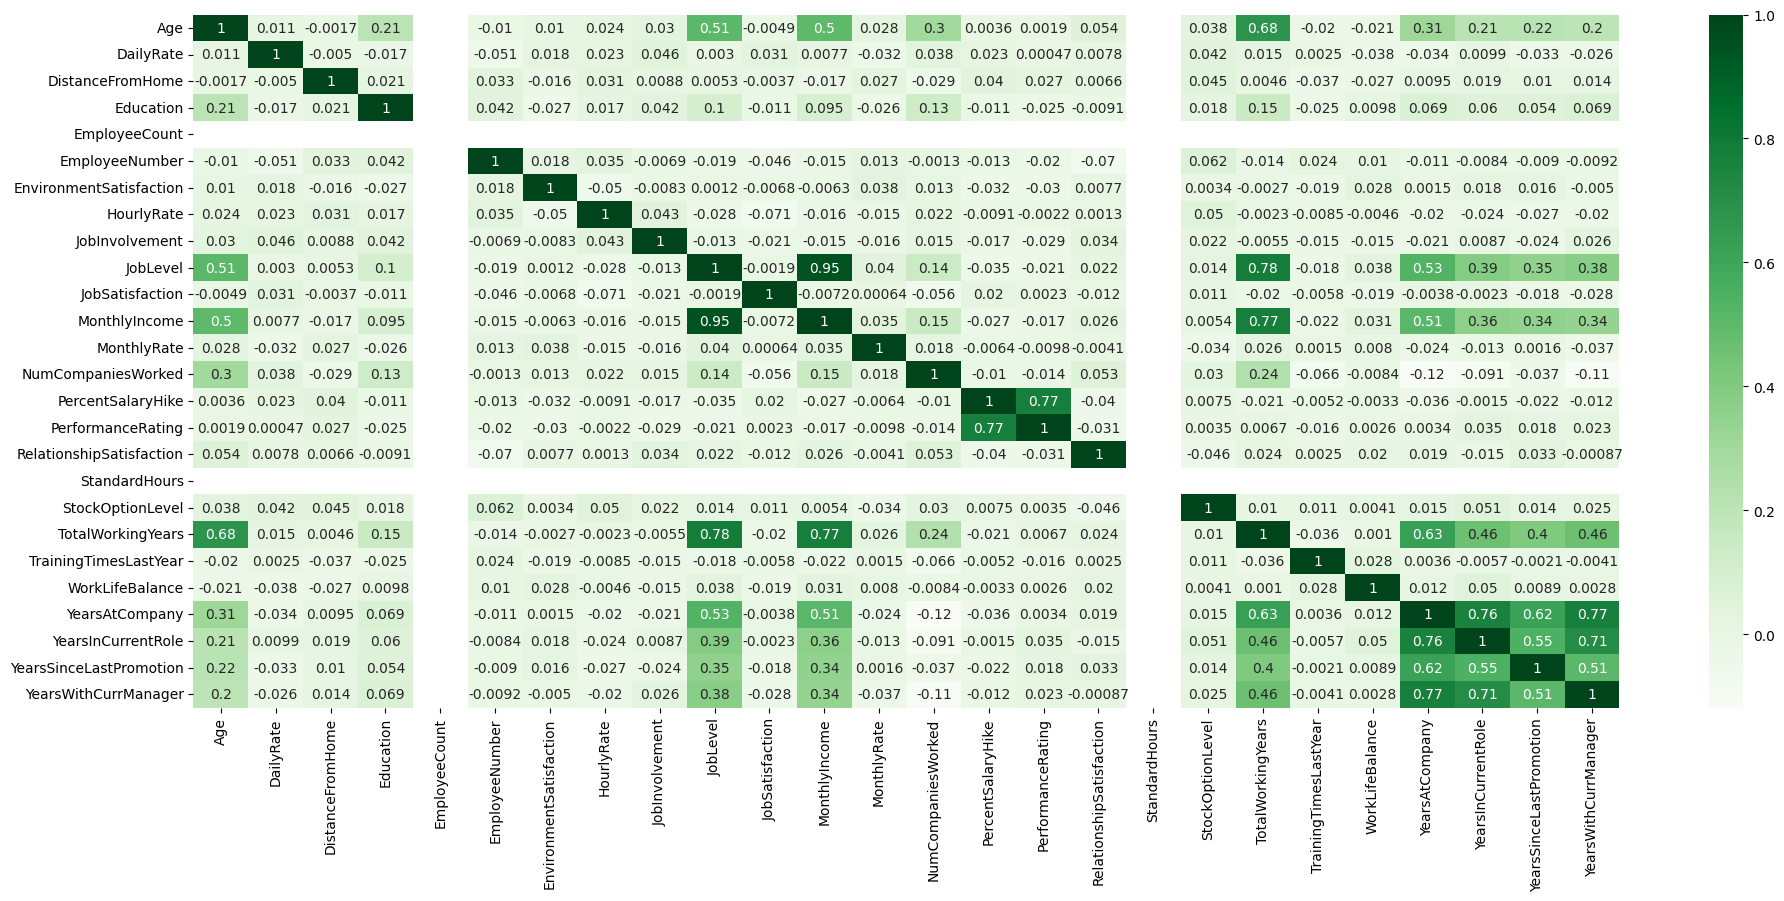

In [16]:
plt.figure(figsize=(23, 9))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="Greens")

* Here we are getting white space for both EmployeeCount and StandardHours because the values in all rows for them they have same values , if any column having all same values then Standard deviation will be Zero

<Axes: >

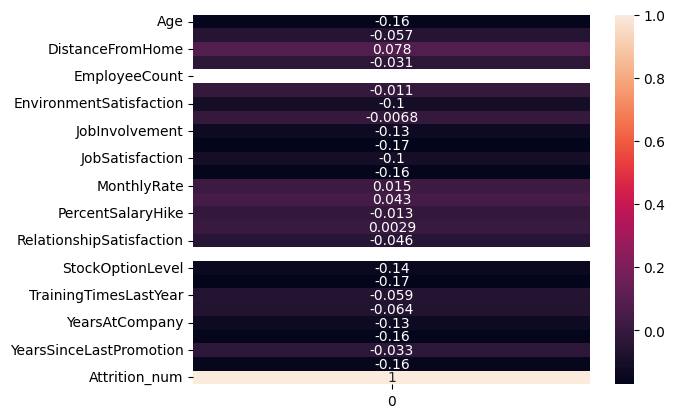

In [17]:
df['Attrition_num'] = df['Attrition'].map({'Yes': 1, 'No': 0})
correlation = df.corrwith(df['Attrition_num'])
sns.heatmap(correlation.to_frame(), annot=True)

* Converted Yes:1 and No:1 in Attrition and added a new Column Attrition_num
* But the above correlation may be or maynot be correct as we had converted categorical to numerical so we cannnot perfectly say that correlation was correct.

In [18]:
corr_sort = correlation.abs().sort_values(ascending=False)
corr_sort

Attrition_num               1.000000
TotalWorkingYears           0.171063
JobLevel                    0.169105
YearsInCurrentRole          0.160545
MonthlyIncome               0.159840
Age                         0.159205
YearsWithCurrManager        0.156199
StockOptionLevel            0.137145
YearsAtCompany              0.134392
JobInvolvement              0.130016
JobSatisfaction             0.103481
EnvironmentSatisfaction     0.103369
DistanceFromHome            0.077924
WorkLifeBalance             0.063939
TrainingTimesLastYear       0.059478
DailyRate                   0.056652
RelationshipSatisfaction    0.045872
NumCompaniesWorked          0.043494
YearsSinceLastPromotion     0.033019
Education                   0.031373
MonthlyRate                 0.015170
PercentSalaryHike           0.013478
EmployeeNumber              0.010577
HourlyRate                  0.006846
PerformanceRating           0.002889
EmployeeCount                    NaN
StandardHours                    NaN
d

<Axes: xlabel='Attrition_num', ylabel='Age'>

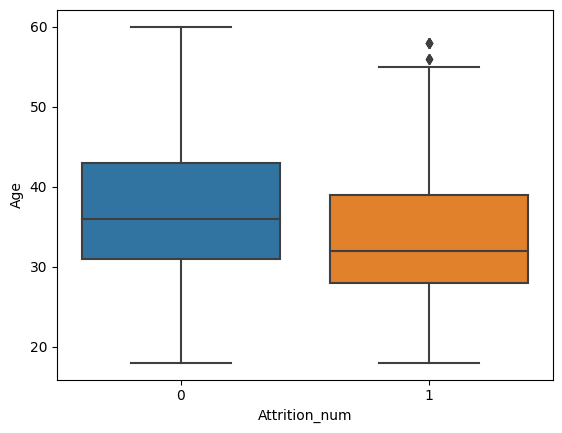

In [19]:
sns.boxplot(x="Attrition_num",y="Age",data=df)

<Axes: xlabel='Attrition_num', ylabel='count'>

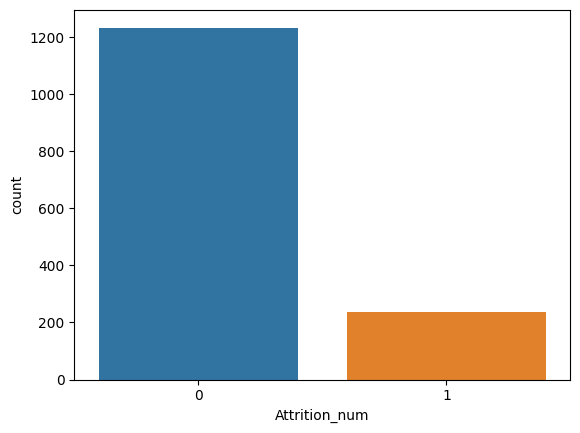

In [20]:
sns.countplot(x=df["Attrition_num"])

<Axes: xlabel='YearsAtCompany', ylabel='Count'>

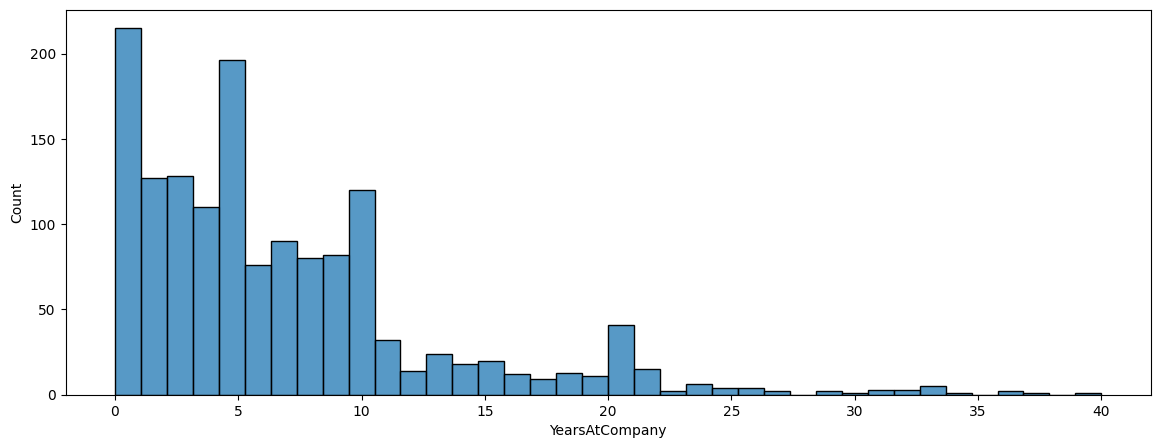

In [21]:
plt.figure(figsize=(14,5))
sns.histplot(df["YearsAtCompany"])

<Axes: xlabel='Gender', ylabel='TotalWorkingYears'>

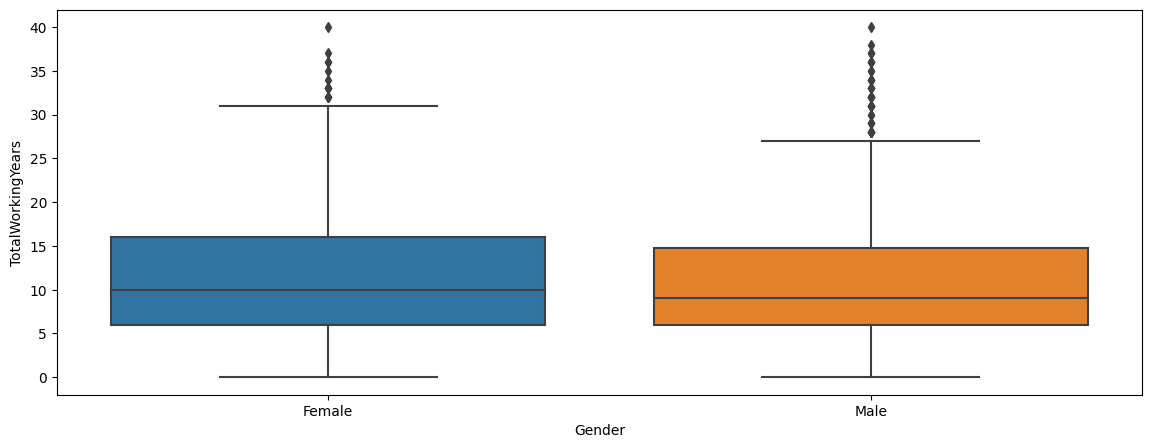

In [22]:
plt.figure(figsize=(14,5))
sns.boxplot(y = df["TotalWorkingYears"],x=df["Gender"])

<Axes: >

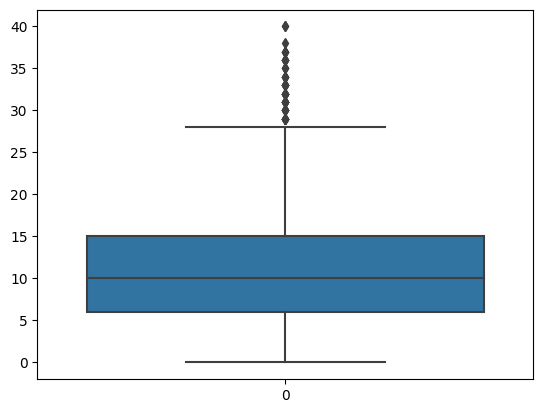

In [23]:
sns.boxplot(df["TotalWorkingYears"])

<Axes: xlabel='Age', ylabel='Count'>

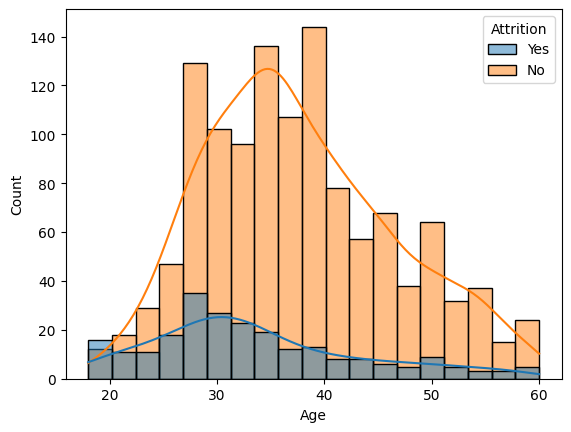

In [24]:
sns.histplot(data=df, x='Age', hue='Attrition', kde=True)

<Axes: xlabel='JobSatisfaction', ylabel='Count'>

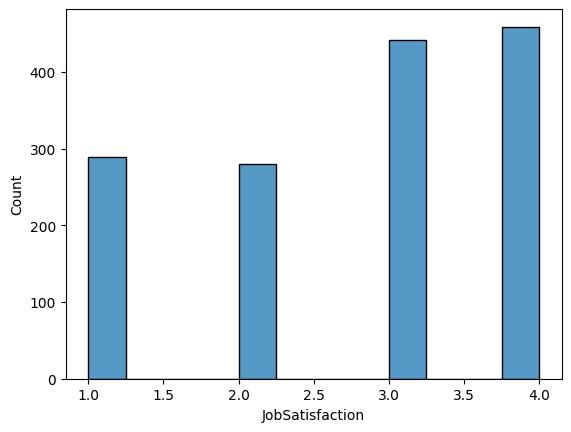

In [25]:
sns.histplot(df["JobSatisfaction"])

<Axes: xlabel='JobInvolvement', ylabel='Count'>

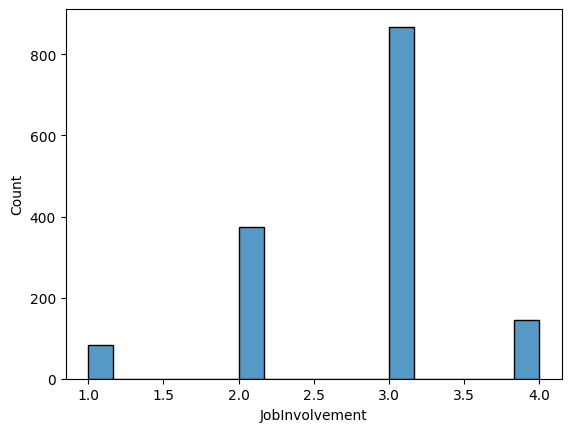

In [26]:
sns.histplot(df["JobInvolvement"])

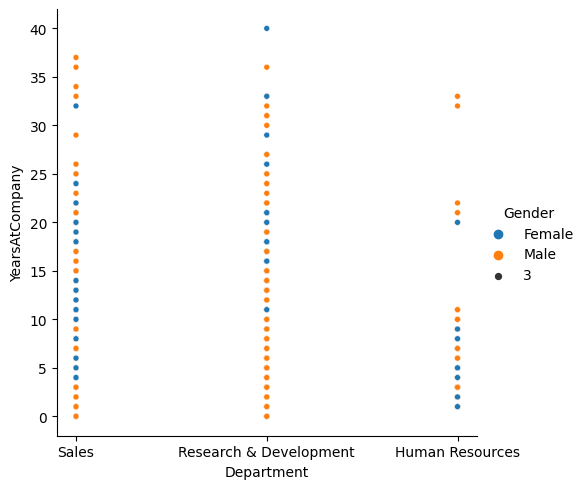

In [27]:
sns.relplot(x="Department", y="YearsAtCompany",hue="Gender", data=df, size=3)

sns.pairplot(df, height=8)
plt.show()

### Drop Unecessary Columns :

* EmployeeNumber, as it was diff for all so dropping is best. This was unique id to all, model will never depend on this

* Correlation with Attrition :

  HourlyRate                  0.006846
  
  PerformanceRating           0.002889
  
* EmployeeCount, StandardHours -> same for all so no need

In [28]:
df.drop(columns=["EmployeeNumber","StandardHours","EmployeeCount","PerformanceRating","HourlyRate"],axis=1,inplace=True)

### Outliers

<Axes: >

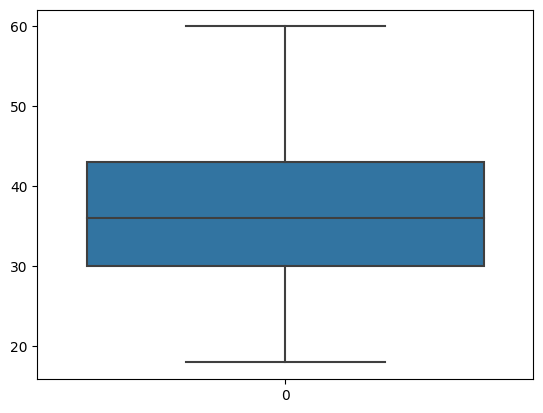

In [29]:
sns.boxplot(df.Age)

<Axes: >

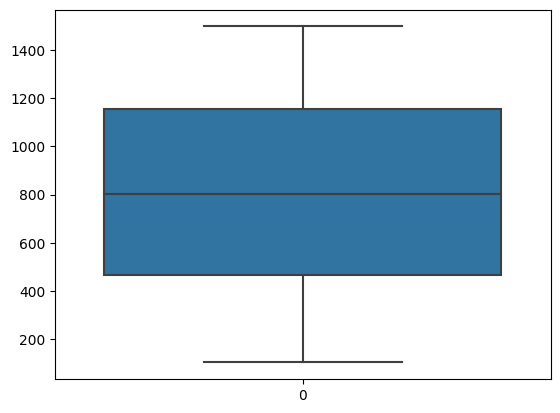

In [30]:
sns.boxplot(df.DailyRate)

* As of Now no outliers detected.

<Axes: >

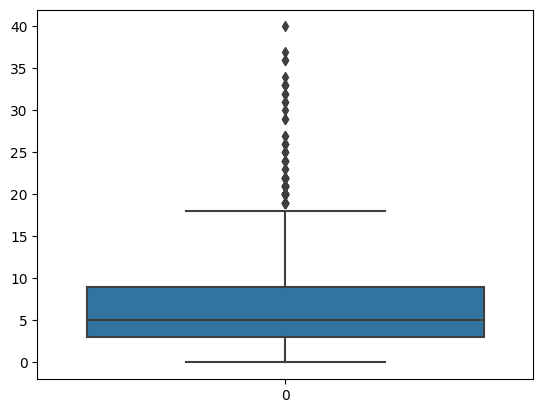

In [31]:
sns.boxplot(df.YearsAtCompany)

In [34]:
Q1 = df.YearsAtCompany.quantile(0.25)

Q3 = df.YearsAtCompany.quantile(0.75)

IQR = Q3 - Q1
IQR

6.0

In [ ]:
IQR = Q3 - Q1
IQR

6.0

In [35]:
upperLimit = Q3 + 1.5*IQR
lowerLimit = Q1 - 1.5 * IQR

In [36]:
print("Upper Limit : ",upperLimit)

Upper Limit :  18.0


In [37]:
forUpperLimit = df["YearsAtCompany"]>upperLimit
forLowerLimit = df["YearsAtCompany"]<lowerLimit
totalOutliers = forUpperLimit + forLowerLimit
print("Total Outliers are : ",totalOutliers.sum())

Total Outliers are :  104


In [38]:
df.shape

(1470, 31)

\* Replacing with median

In [39]:
median_YearsAtCompany = df["YearsAtCompany"].median()
median_YearsAtCompany

5.0

In [40]:
df["YearsAtCompany"] = np.where((df["YearsAtCompany"] > upperLimit) | (df["YearsAtCompany"] < lowerLimit),median_YearsAtCompany, df["YearsAtCompany"])

<Axes: >

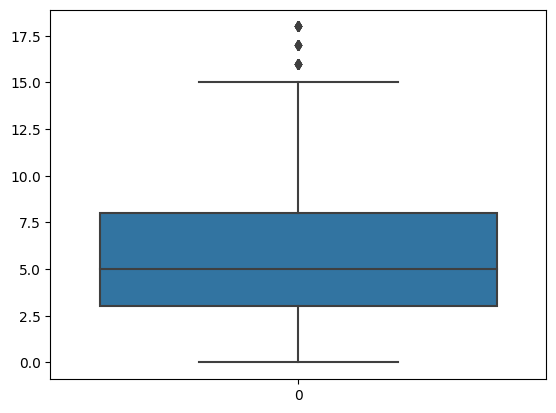

In [41]:
sns.boxplot(df.YearsAtCompany)

* Outliers Replace successfully

### Splitting Dependent and Independent variables

In [42]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_num
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,0,8,0,1,6.0,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,1,10,3,3,10.0,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,0,7,3,3,0.0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,0,8,3,3,8.0,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,1,6,3,3,2.0,2,2,2,0


In [43]:
dependent = df["Attrition_num"]

In [44]:
dependent

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition_num, Length: 1470, dtype: int64

In [45]:
independent = df.drop(columns=["Attrition_num", "Attrition"])

In [46]:
independent.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,3,...,11,1,0,8,0,1,6.0,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,2,...,23,4,1,10,3,3,10.0,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,2,...,15,2,0,7,3,3,0.0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,3,...,11,3,0,8,3,3,8.0,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,3,...,12,4,1,6,3,3,2.0,2,2,2


* We have to make sure that independent is in DataFrame and dependent in Series

In [47]:
type(independent)

pandas.core.frame.DataFrame

In [48]:
type(dependent)

pandas.core.series.Series

###  Encoding

In [49]:
independent.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,3,...,11,1,0,8,0,1,6.0,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,2,...,23,4,1,10,3,3,10.0,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,2,...,15,2,0,7,3,3,0.0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,3,...,11,3,0,8,3,3,8.0,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,3,...,12,4,1,6,3,3,2.0,2,2,2


In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
le = LabelEncoder()

In [52]:
independent["BusinessTravel"].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [53]:
independent["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [54]:
independent["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [55]:
independent["BusinessTravel"] = le.fit_transform(independent["BusinessTravel"])

In [56]:
independent["BusinessTravel"].head()

0    2
1    1
2    2
3    1
4    2
Name: BusinessTravel, dtype: int64

In [57]:
independent["BusinessTravel"].tail()

1465    1
1466    2
1467    2
1468    1
1469    2
Name: BusinessTravel, dtype: int64

In [58]:
print(le.classes_)

['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']


In [59]:
independent["Department"] = le.fit_transform(independent["Department"])

In [60]:
independent["Department"].head()

0    2
1    1
2    1
3    1
4    1
Name: Department, dtype: int64

In [61]:
print(le.classes_)

['Human Resources' 'Research & Development' 'Sales']


In [62]:
independent["EducationField"] = le.fit_transform(independent["EducationField"])

In [63]:
independent["EducationField"].head()

0    1
1    1
2    4
3    1
4    3
Name: EducationField, dtype: int64

In [64]:
print(le.classes_)

['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']


In [65]:
independent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   BusinessTravel            1470 non-null   int64  
 2   DailyRate                 1470 non-null   int64  
 3   Department                1470 non-null   int64  
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   int64  
 7   EnvironmentSatisfaction   1470 non-null   int64  
 8   Gender                    1470 non-null   object 
 9   JobInvolvement            1470 non-null   int64  
 10  JobLevel                  1470 non-null   int64  
 11  JobRole                   1470 non-null   object 
 12  JobSatisfaction           1470 non-null   int64  
 13  MaritalStatus             1470 non-null   object 
 14  MonthlyI

* As there are still 5 so converting one by one better use for Loop

In [67]:
obj_col = independent.select_dtypes(include=['object']).columns


for column in obj_col:
    independent[column] = le.fit_transform(independent[column])

In [68]:
independent.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,3,...,11,1,0,8,0,1,6.0,4,0,5
1,49,1,279,1,8,1,1,3,1,2,...,23,4,1,10,3,3,10.0,7,1,7
2,37,2,1373,1,2,2,4,4,1,2,...,15,2,0,7,3,3,0.0,0,0,0
3,33,1,1392,1,3,4,1,4,0,3,...,11,3,0,8,3,3,8.0,7,3,0
4,27,2,591,1,2,1,3,1,1,3,...,12,4,1,6,3,3,2.0,2,2,2


In [69]:
independent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   BusinessTravel            1470 non-null   int64  
 2   DailyRate                 1470 non-null   int64  
 3   Department                1470 non-null   int64  
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   int64  
 7   EnvironmentSatisfaction   1470 non-null   int64  
 8   Gender                    1470 non-null   int64  
 9   JobInvolvement            1470 non-null   int64  
 10  JobLevel                  1470 non-null   int64  
 11  JobRole                   1470 non-null   int64  
 12  JobSatisfaction           1470 non-null   int64  
 13  MaritalStatus             1470 non-null   int64  
 14  MonthlyI

### Splitting Data into Train and Test

In [70]:
from sklearn.model_selection import train_test_split as tts

In [71]:
independent.shape, dependent.shape

((1470, 29), (1470,))

In [72]:
independent_train,independent_test,dependent_train,dependent_test = tts(independent,dependent,test_size=0.2,random_state=0)

In [73]:
independent_train.shape , independent_test.shape, dependent_train.shape, dependent_test.shape

((1176, 29), (294, 29), (1176,), (294,))

Below are train and test without feature scaling.

In [74]:
independent_wfs_train = independent_train
dependent_wfs_train = dependent_train

independent_wfs_test = independent_test
dependent_wfs_test = dependent_test

### Feature Scaling

* Only for independent we will perform Feature Scaling

In [75]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

In [76]:
independent_train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [77]:
independent_train=pd.DataFrame(ms.fit_transform(independent_train),columns=independent_train.columns)
independent_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.952381,1.0,0.359140,1.0,0.714286,0.50,0.2,1.000000,0.0,0.666667,...,0.142857,0.666667,0.333333,0.725,0.333333,0.333333,0.055556,0.000000,0.000000,0.000000
1,0.642857,1.0,0.606452,0.5,0.964286,0.50,1.0,1.000000,1.0,0.666667,...,0.642857,1.000000,0.333333,0.200,0.500000,0.666667,0.277778,0.222222,0.000000,0.176471
2,0.523810,1.0,0.140502,1.0,0.892857,0.50,0.4,0.666667,1.0,0.666667,...,0.214286,0.333333,0.333333,0.200,0.500000,0.333333,0.388889,0.388889,0.466667,0.294118
3,0.428571,0.0,0.953405,1.0,0.250000,0.75,0.2,0.000000,1.0,0.333333,...,0.285714,0.333333,0.000000,0.250,0.166667,0.666667,0.555556,0.388889,0.000000,0.529412
4,0.166667,0.5,0.354839,1.0,0.821429,0.00,0.2,0.666667,1.0,0.000000,...,0.214286,1.000000,0.000000,0.025,0.666667,0.666667,0.055556,0.000000,0.066667,0.000000


In [78]:
independent_test=pd.DataFrame(ms.fit_transform(independent_test),columns=independent_test.columns)
independent_test.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.428571,0.0,0.382353,1.0,0.321429,0.75,0.6,0.333333,1.0,0.666667,...,0.214286,1.000000,0.000000,0.270270,0.500000,0.333333,0.555556,0.176471,0.600000,0.411765
1,0.357143,1.0,0.339311,0.5,0.857143,0.50,0.2,1.000000,1.0,0.333333,...,0.142857,1.000000,0.000000,0.135135,0.333333,0.666667,0.277778,0.176471,0.000000,0.117647
2,0.404762,0.5,0.401722,1.0,0.607143,0.75,0.4,1.000000,0.0,0.666667,...,0.500000,0.666667,0.333333,0.135135,0.000000,0.333333,0.222222,0.117647,0.200000,0.117647
3,0.523810,1.0,0.997131,0.5,0.678571,0.75,1.0,0.000000,1.0,0.666667,...,0.642857,1.000000,0.333333,0.378378,1.000000,0.666667,0.611111,0.588235,0.733333,0.058824
4,0.261905,0.5,0.256098,0.5,0.821429,0.25,0.2,1.000000,1.0,0.333333,...,0.928571,0.333333,0.000000,0.027027,0.500000,0.333333,0.055556,0.000000,0.066667,0.000000


### Model Building Using Logistic Regression

Import the model building Libraries

In [79]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

Initializing the model

In [80]:
model.fit(independent_train,dependent_train)

LogisticRegression()

In [81]:
type(dependent_test)

pandas.core.series.Series

Training and testing the model

In [82]:
pred=model.predict(independent_test)
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

In [83]:
dependent_test

442     0
1091    0
981     1
785     0
1332    1
       ..
1439    0
481     0
124     1
198     0
1229    0
Name: Attrition_num, Length: 294, dtype: int64

In [84]:
dfActPred = pd.DataFrame({"Actual":dependent_test,"Predicted":pred})

In [85]:
dfActPred.head()

,Actual,Predicted
442,0,0
1091,0,0
981,1,0
785,0,0
1332,1,1


In [86]:
dfActPred.tail()

,Actual,Predicted
1439,0,0
481,0,0
124,1,1
198,0,0
1229,0,0


### Evaluation of classification model

* Accuracy Score

In [87]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [88]:
accuracy_score(dependent_test,pred)

0.8809523809523809

In [89]:
confusion_matrix(dependent_test,pred)

array([[241,   4],
       [ 31,  18]])

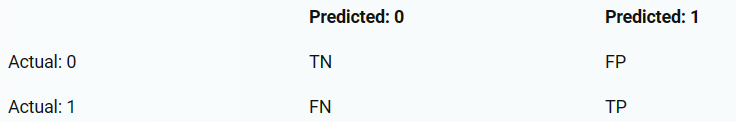

In [90]:
pd.crosstab(dependent_test,pred)

col_0,0,1
Attrition_num,,
0,241,4
1,31,18


TN - 242

FP - 3

FN - 31

TP - 18

In [91]:
(242+18)/(242+3+31+18)

0.8843537414965986

* Support-> Gives actual values , actually 245(0's) and 49(1's) are there

In [92]:
print(classification_report(dependent_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       245
           1       0.82      0.37      0.51        49

    accuracy                           0.88       294
   macro avg       0.85      0.68      0.72       294
weighted avg       0.87      0.88      0.86       294



Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1 Score = 2 x (Precision x Recall) / (Precision + Recall)

In [93]:
precision_formula = (18)/(18+3)
recall_formula = (18)/(18+31)

precision_formula, recall_formula

(0.8571428571428571, 0.3673469387755102)

In [94]:
f1_score_formula = 2*(precision_formula*recall_formula)/(precision_formula+recall_formula)
f1_score_formula

0.5142857142857143

In [95]:
from sklearn.metrics import precision_score, recall_score,f1_score

In [96]:
precision = precision_score(dependent_test,pred)
recall = recall_score(dependent_test,pred)

In [97]:
precision, recall

(0.8181818181818182, 0.3673469387755102)

In [98]:
f1Score = f1_score(dependent_test,pred)
f1Score

0.5070422535211268

### ROC-AOC Curve

In [99]:
probability=model.predict_proba(independent_test)[:,1]

In [100]:
probability

array([0.12828244, 0.19369685, 0.34920229, 0.06038103, 0.65795462,
       0.05430455, 0.54145784, 0.06665542, 0.00486915, 0.388736  ,
       0.06275053, 0.32119327, 0.02272431, 0.68976977, 0.24600875,
       0.03256672, 0.10666575, 0.1997333 , 0.05050582, 0.2021188 ,
       0.23970548, 0.01418173, 0.05859041, 0.05853473, 0.60027082,
       0.40905485, 0.06590233, 0.03545081, 0.70721683, 0.06068017,
       0.01447251, 0.02635917, 0.07712213, 0.18701406, 0.07186528,
       0.03471087, 0.09734775, 0.07691426, 0.03429251, 0.05737418,
       0.07951076, 0.02038232, 0.01497922, 0.00974708, 0.02557284,
       0.52531464, 0.39568458, 0.00393747, 0.76421606, 0.51902037,
       0.12369466, 0.43534417, 0.07073222, 0.2259986 , 0.66702253,
       0.23406979, 0.02121775, 0.30484911, 0.0271348 , 0.17410648,
       0.023321  , 0.2289148 , 0.15861703, 0.02862008, 0.41824513,
       0.03527674, 0.26212403, 0.11413961, 0.07858226, 0.11189949,
       0.06785079, 0.29088058, 0.06949795, 0.08119138, 0.12318

In [101]:
fpr,tpr,threshsholds = roc_curve(dependent_test,probability)

In [102]:
fpr,tpr,threshsholds

(array([0.        , 0.        , 0.        , 0.00408163, 0.00408163,
        0.00816327, 0.00816327, 0.0122449 , 0.0122449 , 0.01632653,
        0.01632653, 0.05714286, 0.05714286, 0.06122449, 0.06122449,
        0.07346939, 0.07346939, 0.08979592, 0.08979592, 0.09795918,
        0.09795918, 0.11020408, 0.11020408, 0.13061224, 0.13061224,
        0.13469388, 0.13469388, 0.13877551, 0.13877551, 0.1755102 ,
        0.1755102 , 0.2       , 0.2       , 0.2122449 , 0.2122449 ,
        0.25714286, 0.25714286, 0.28163265, 0.28163265, 0.29387755,
        0.29387755, 0.37142857, 0.37142857, 0.3755102 , 0.3755102 ,
        0.44489796, 0.44489796, 0.55510204, 0.55510204, 0.73061224,
        0.73061224, 0.80816327, 0.80816327, 0.83265306, 0.83265306,
        1.        ]),
 array([0.        , 0.02040816, 0.10204082, 0.10204082, 0.16326531,
        0.16326531, 0.26530612, 0.26530612, 0.36734694, 0.36734694,
        0.44897959, 0.44897959, 0.46938776, 0.46938776, 0.48979592,
        0.48979592, 0.5102

* Area under this curve is AUC

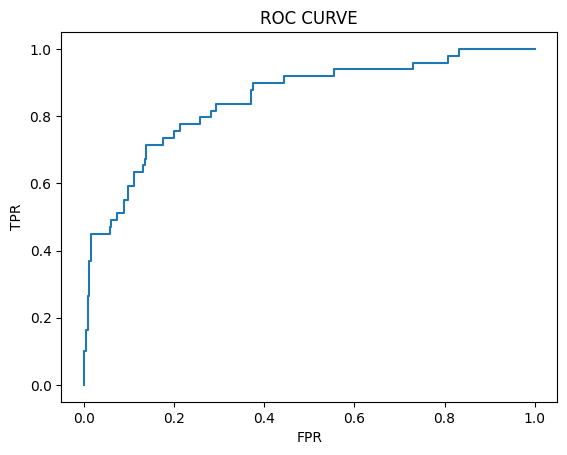

In [103]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

### Model Building Using Decision Tree

In [104]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [105]:
dtc.fit(independent_wfs_train,dependent_wfs_train)

DecisionTreeClassifier()

In [106]:
pred_dtc=dtc.predict(independent_wfs_test)
pred_dtc

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

### Evaluation

In [107]:
accuracy_score(dependent_wfs_test,pred_dtc)

0.7721088435374149

### Tree

In [108]:
from sklearn import tree

In [109]:
import graphviz

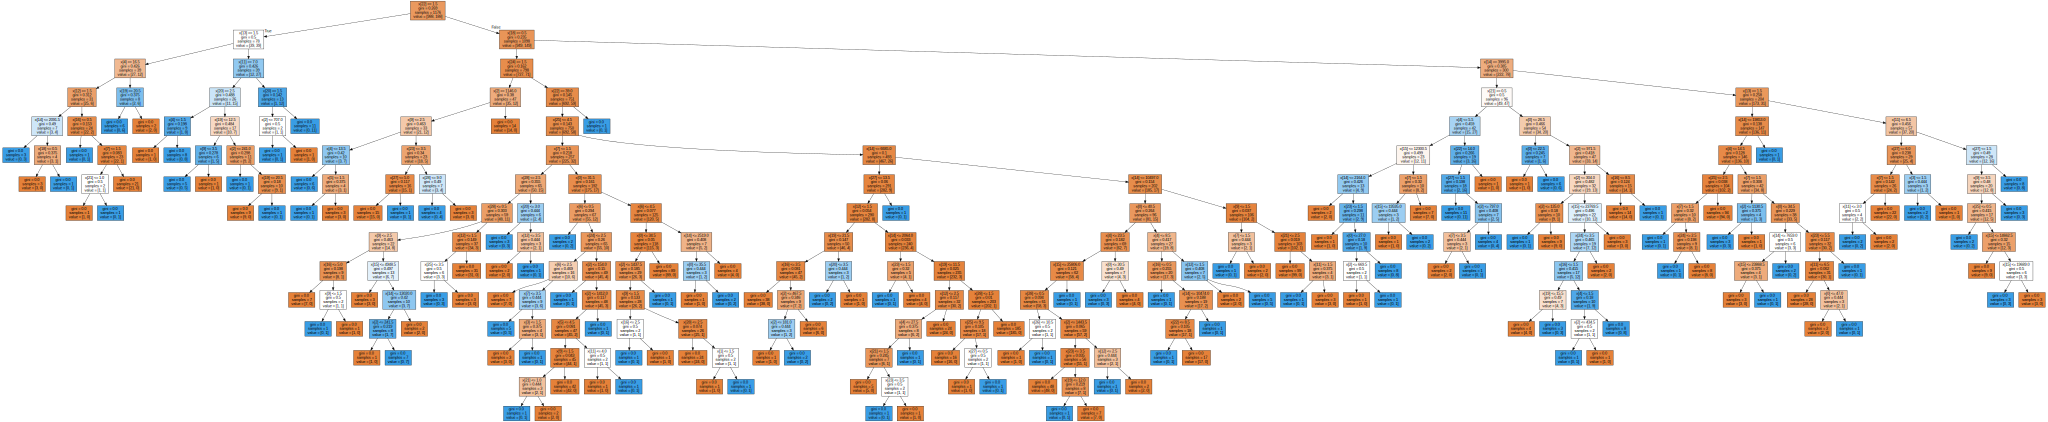

In [110]:
dot_data = tree.export_graphviz(dtc, out_file=None,feature_names=None,class_names=None,filled=True)

graph = graphviz.Source(dot_data)
graph

### Hyper Parameters Tuning

* To increase the accuracy we use Hyper Parameter tuning

In [111]:
from sklearn.model_selection import GridSearchCV

Pre-Pruning

In [112]:
parameter_dtc = {
 'criterion': ['gini', 'entropy'],
 'splitter': ['best', 'random'],
 'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
 'min_samples_split': [2, 5, 10, 15, 20],
 'min_samples_leaf': [1, 2, 4, 6, 8],
 'max_features': ['auto', 'sqrt', 'log2', None],
 'class_weight': [None, 'balanced']
}

In [113]:
gridSearch=GridSearchCV(estimator=dtc,param_grid=parameter_dtc,cv=5,scoring='accuracy')

In [115]:
gridSearch.fit(independent_wfs_train, dependent_wfs_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                       20],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [116]:
gridSearch.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 6,
 'min_samples_split': 15,
 'splitter': 'random'}

In [117]:
dtc_cv = DecisionTreeClassifier(
    class_weight=None,
    criterion='entropy',
    max_depth=4,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=5,
    splitter='random'
)

In [118]:
dtc_cv.fit(independent_wfs_train,dependent_wfs_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=5,
                       splitter='random')

In [119]:
pred_dtc_cv = dtc_cv.predict(independent_wfs_test)

In [120]:
print(classification_report(dependent_wfs_test,pred_dtc_cv))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       245
           1       0.50      0.16      0.25        49

    accuracy                           0.83       294
   macro avg       0.68      0.57      0.58       294
weighted avg       0.79      0.83      0.80       294

